In [3]:
%matplotlib inline

### 1.  用Numpy, 或者别的办法打开下面的csv文件 。

In [8]:
import numpy as np
import csv
import pandas as pd
from scipy import fftpack
from matplotlib import pyplot as plt



file = open('D:\\git_room\\week-7\\sunspot_data.csv')
reader = csv.reader(file)
reader_list = list(reader)
reader_list
# print(reader_list[0])
del reader_list[0]
# print(reader_list[0])
reader_array = np.asarray(reader_list)
# print(reader_array[0])

### 2. 文件是真实的观测数据，数据给出了每天的太阳黑子数，请仔细看字段说明。

#### ['', 'Year', 'Month', 'Day', 'Date In Fraction Of Year', 'Number of Sunspots', 'Standard Deviation', 'Observations', 'Indicator']

### 3. 讨论黑子变化的周期性。

In [2]:
plt.clf()

<Figure size 432x288 with 0 Axes>

[1818. 1818. 1818. ... 2019. 2019. 2019.] 
 [-1. -1. -1. ...  0.  0.  0.]


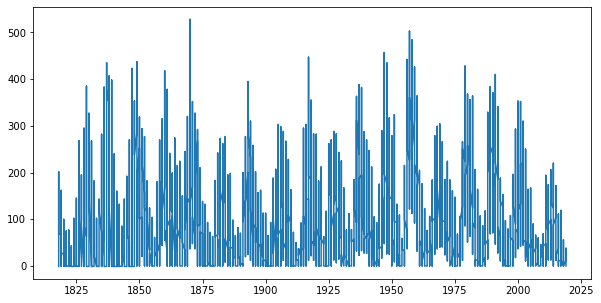

In [19]:
# print(reader_array[:, 1:3])
reader_array_x = reader_array[:, 1:4]
reader_array_y = reader_array[:, 5:]
# print(reader_array_x,"\n", reader_array_y)
years = reader_array_x[:,0:1].reshape(1,73718)[0]
years = years.astype(np.float32)
Number_of_Sunspots = reader_array_y[:,0:1].reshape(1,73718)[0]
Number_of_Sunspots = Number_of_Sunspots.astype(np.float32)
print(years,"\n",Number_of_Sunspots)

# fig, (ax0,ax1,ax2) = plt.subplots(3, 1, figsize=(12, 8))
# ax0.plot(years,Number_of_Sunspots)
plt.figure(figsize=(10, 5))
plt.plot(years, Number_of_Sunspots)

### 有现成的就用

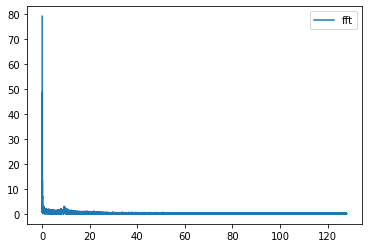

In [21]:
Fs = 256
N = len(years)
freq = np.arange(N) / N * Fs

Y = np.fft.fft(Number_of_Sunspots)/(N/2)
Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]

plt.plot(freq_half,abs(Y_half),label='fft')
plt.legend()

[]

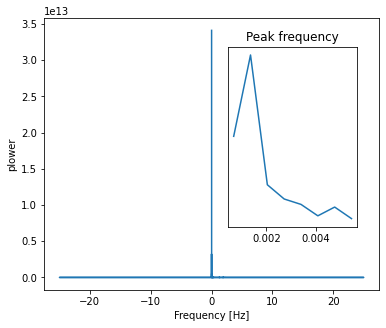

In [33]:
# The FFT of the signal
sig_fft = fftpack.fft(Number_of_Sunspots)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(Number_of_Sunspots.size, d=0.02)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(10, 1./10)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

In [31]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(10, 5))
# plt.plot(years, Number_of_Sunspots, label='Original signal')
plt.plot(years, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

D:\anacoda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
